## Option Setting

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [2]:
pd.set_option('max_rows', 1000)
pd.set_option('max_columns', 1000)

In [3]:
DataPATH = \
'C:\\Users\\PC\\Documents\\Python\\빅데이터 분석 및 시각화 개론\\Baseball pitcher-change BOT\\Data\\stats\\'

In [4]:
teamPATH = 'team\\'
batterPATH = 'batter\\'
pitcherPATH = 'pitcher\\'
defensePATH = 'defense\\'
audiencePATH = 'audience\\'
salaryPATH = 'salary\\'
physicalPATH = 'physical\\'
FAPATH = 'FA\\'
googlePATH = 'google\\'

## Prototype: 2017 Data only

### Read Data

#### team Data

In [5]:
team17 = pd.read_excel(DataPATH + teamPATH + 'team17.xlsx')
team17 = team17.drop(['경기수', '연속', '타율', '평균자책점'], axis=1)
team17 = team17.sort_values(by='팀명').set_index('팀명')

team17.T

팀명,KIA,LG,NC,SK,kt,넥센,두산,롯데,삼성,한화
순위,1.000,6.000,4.00,5.000,10.000,7.000,2.000,3.000,9.000,8.00
승,87.000,69.000,79.00,75.000,50.000,69.000,84.000,80.000,55.000,61.00
패,56.000,72.000,62.00,68.000,94.000,73.000,57.000,62.000,84.000,81.00
무,1.000,3.000,3.00,1.000,0.000,2.000,3.000,2.000,5.000,2.00
승률,0.608,0.489,0.56,0.524,0.347,0.486,0.596,0.563,0.396,0.43
게임차,0.000,17.000,7.00,12.000,37.500,17.500,2.000,6.500,30.000,25.50


#### batter Data

In [6]:
batter17 = pd.read_excel(DataPATH + batterPATH + 'batter17.xlsx')
batter17 = batter17.drop(['순'], axis=1)
batter17 = batter17.rename(columns={'이름': '팀명'})
batter17 = batter17.sort_values(by='팀명').set_index('팀명')
batter17 = batter17.add_prefix('batter_')

batter17.T

팀명,KIA,LG,NC,SK,kt,넥센,두산,롯데,삼성,한화
batter_G,1932.000,1896.000,1987.000,1772.000,1864.000,1813.000,1825.000,1844.000,1786.000,1787.000
batter_타석,5841.000,5614.000,5790.000,5564.000,5485.000,5712.000,5833.000,5671.000,5707.000,5665.000
batter_타수,5142.000,4944.000,5079.000,4925.000,4937.000,5098.000,5102.000,4994.000,5095.000,5030.000
batter_득점,906.000,699.000,786.000,761.000,655.000,789.000,849.000,743.000,757.000,737.000
batter_안타,1554.000,1390.000,1489.000,1337.000,1360.000,1479.000,1499.000,1425.000,1419.000,1445.000
batter_2타,292.000,216.000,277.000,222.000,274.000,267.000,270.000,250.000,255.000,261.000
batter_3타,29.000,20.000,19.000,15.000,17.000,30.000,20.000,17.000,36.000,16.000
batter_홈런,170.000,110.000,149.000,234.000,119.000,141.000,178.000,151.000,145.000,150.000
batter_루타,2414.000,1976.000,2251.000,2291.000,2025.000,2229.000,2343.000,2162.000,2181.000,2188.000
batter_타점,868.000,664.000,739.000,733.000,625.000,748.000,812.000,697.000,703.000,684.000


#### pitcher Data

In [7]:
pitcher17 = pd.read_excel(DataPATH + pitcherPATH + 'pitcher17.xlsx')
pitcher17 = pitcher17.drop(['순', '선발'], axis=1)
pitcher17 = pitcher17.rename(columns={'이름':'팀명'})
pitcher17 = pitcher17.sort_values(by='팀명').set_index('팀명')
pitcher17 = pitcher17.add_prefix('pitcher_')

pitcher17.T

팀명,KIA,LG,NC,SK,kt,넥센,두산,롯데,삼성,한화
pitcher_출장,582.00,619.00,620.00,608.00,588.00,554.00,590.00,623.00,613.00,634.00
pitcher_완투,5.00,4.00,1.00,2.00,4.00,2.00,3.00,1.00,1.00,1.00
pitcher_완봉,2.00,1.00,0.00,1.00,2.00,1.00,2.00,0.00,0.00,0.00
pitcher_승,87.00,69.00,79.00,75.00,50.00,69.00,84.00,80.00,55.00,61.00
pitcher_패,56.00,72.00,62.00,68.00,94.00,73.00,57.00,62.00,84.00,81.00
pitcher_세,33.00,32.00,32.00,30.00,22.00,40.00,35.00,39.00,27.00,31.00
pitcher_홀드,46.00,66.00,51.00,64.00,41.00,66.00,46.00,59.00,34.00,49.00
pitcher_이닝,1290.00,1279.00,1284.20,1270.20,1256.00,1271.00,1288.00,1287.10,1281.10,1273.00
pitcher_실점,743.00,677.00,745.00,767.00,876.00,764.00,678.00,701.00,911.00,820.00
pitcher_자책,691.00,614.00,673.00,710.00,806.00,714.00,627.00,653.00,840.00,749.00


#### defense Data

In [8]:
defense17 = pd.read_excel(DataPATH + defensePATH + 'defense17.xlsx')
defense17 = defense17.drop(['순'], axis=1)
defense17 = defense17.rename(columns={'이름': '팀명'})
defense17 = defense17.sort_values(by='팀명').set_index('팀명')
defense17 = defense17.add_prefix('defense_')

defense17

,defense_출장,defense_선발,defense_이닝,defense_기회,defense_자살,defense_보살,defense_실책,defense_수비율,defense_RF9,defense_RNG,defense_ARM,defense_CS,defense_BLK,defense_E+,defense_RAA,defense_/133,defense_POSADJ,defense_RAAwithADJ,defense_WAAw/oADJ,defense_WAAwithADJ
팀명,,,,,,,,,,,,,,,,,,,,
KIA,2193,1296,11610,5463,3870,1495,98,0.982,4.16,-2.23,8.46,0.96,-0.07,0.22,7.35,0.76,-0.20,7.14,0.699,0.699
LG,2203,1296,11511,5375,3837,1435,103,0.981,4.12,39.31,0.00,-0.35,-0.38,-0.95,37.64,3.91,-0.02,37.62,3.509,3.509
NC,2244,1296,11562,5389,3854,1427,108,0.980,4.11,20.92,5.78,0.31,-0.94,-1.86,24.20,2.51,-0.34,23.86,2.230,2.230
SK,2107,1296,11436,5469,3811,1550,108,0.980,4.22,0.27,0.33,-0.22,1.03,-2.07,-0.67,-0.07,-0.22,-0.88,-0.053,-0.053
kt,2102,1296,11304,5336,3768,1456,112,0.979,4.16,-35.72,-5.26,-2.70,-0.77,-3.10,-47.55,-5.04,-0.07,-47.62,-4.384,-4.384
넥센,2029,1296,11439,5325,3813,1421,91,0.983,4.12,-21.15,-7.52,0.54,1.36,1.33,-25.44,-2.66,-0.21,-25.65,-2.324,-2.324
두산,2126,1296,11592,5424,3864,1470,90,0.983,4.14,8.01,-0.69,-0.18,2.05,1.79,10.98,1.13,-0.35,10.63,1.031,1.031
롯데,2126,1296,11586,5456,3862,1508,86,0.984,4.17,-3.29,1.20,-0.55,-0.69,2.58,-0.74,-0.08,-0.27,-1.01,-0.073,-0.073
삼성,2086,1296,11532,5391,3844,1452,95,0.982,4.13,1.46,4.06,-0.33,-0.64,0.69,5.24,0.54,-0.47,4.76,0.513,0.513


#### audience Data

In [9]:
audience17 = pd.read_excel(DataPATH + audiencePATH + 'audience17.xlsx')
audience17 = audience17.drop('Ranking', axis=1)
audience17 = audience17.rename(columns={'Team': '팀명', 'Audi_avg': 'audience_avg', 'Audi_total': 'audience_total'})
audience17 = audience17.sort_values(by='팀명').set_index('팀명')

audience17

,audience_avg,audience_total
팀명,,
KIA,14907,2146672
LG,15762,1134846
NC,7377,531121
SK,12396,892541
kt,9535,686541
넥센,9714,699380
두산,15206,1094829
롯데,14424,1038492
삼성,9790,704857


#### salary Data

In [10]:
salary17 = pd.read_excel(DataPATH + salaryPATH + 'salary17.xlsx')
salary17 = salary17.drop(['순위', '도루실패', '고의4구', '희생번트', '희생플라이'], axis=1)
salary17 = salary17.rename(columns={'총 연봉(만원)': 'total', '평균 연봉(만원)': 'avg'})
salary17 = salary17.sort_values(by='팀명').set_index('팀명')
salary17 = salary17.add_prefix('salary_')

salary17

,salary_total,salary_avg
팀명,,
KIA,859600,31837
LG,72800,21215
NC,545000,20185
SK,677100,25078
kt,306300,11344
넥센,441400,16348
두산,633400,23459
롯데,829100,30707
삼성,689400,25533


#### physical Data

In [11]:
physical17 = pd.read_excel(DataPATH + physicalPATH + 'physical17.xlsx')
physical17 = physical17.drop('순위', axis=1)
physical17 = physical17.sort_values(by='팀명').set_index('팀명')
physical17 = physical17.add_prefix('physical_')

physical17

,physical_평균년차,physical_평균연령,physical_평균신장,physical_평균체중
팀명,,,,
KIA,9.2,28.3,183.0,90.0
LG,8.4,27.5,183.6,85.4
NC,7.5,26.4,183.0,86.0
SK,8.8,27.7,182.0,87.0
kt,8.4,27.5,181.7,85.1
넥센,7.1,25.9,182.0,87.0
두산,8.0,26.5,183.0,85.0
롯데,9.0,27.9,183.8,90.6
삼성,7.8,27.6,181.0,82.7


#### FA Data

In [12]:
FA17 = pd.read_excel(DataPATH + FAPATH + 'FA17.xlsx')
FA17 = FA17.drop('순위', axis=1)
FA17 = FA17.sort_values(by='팀명').set_index('팀명')
FA17 = FA17.add_prefix('FA_')

FA17

,FA_FA지출,FA_FA수익,FA_순수익
팀명,,,
KIA,1625000,0,-1625000
LG,1170000,650000,-520000
NC,0,0,0
SK,850000,0,-850000
kt,150000,0,-150000
넥센,0,0,0
두산,770000,270000,-500000
롯데,1500000,0,-1500000
삼성,920000,1950000,1030000


#### google Data

In [13]:
google17 = pd.read_excel(DataPATH + googlePATH + 'google17.xlsx')
google17 = google17.drop(['순위'], axis=1)
google17 = google17.sort_values(by='팀명').set_index('팀명')
google17 = google17.add_prefix('google_')

google17

,google_검색
팀명,
KIA,1390000
LG,268000
NC,193000
SK,109000
kt,8810
넥센,145000
두산,212000
롯데,123000
삼성,276000


### combine Data

In [95]:
combined17 = pd.merge(team17, batter17[batter17.columns.difference(team17.columns)], how='outer', left_index=True, right_index=True)
combined17 = pd.merge(combined17, pitcher17[pitcher17.columns.difference(combined17.columns)], how='outer', left_index=True, right_index=True)
combined17 = pd.merge(combined17, defense17[defense17.columns.difference(combined17.columns)], how='outer', left_index=True, right_index=True)
combined17 = pd.merge(combined17, audience17[audience17.columns.difference(combined17.columns)], how='outer', left_index=True, right_index=True)
combined17 = pd.merge(combined17, salary17[salary17.columns.difference(combined17.columns)], how='outer', left_index=True, right_index=True)
combined17 = pd.merge(combined17, physical17[physical17.columns.difference(combined17.columns)], how='outer', left_index=True, right_index=True)
combined17 = pd.merge(combined17, FA17[FA17.columns.difference(combined17.columns)], how='outer', left_index=True, right_index=True)
combined17 = pd.merge(combined17, google17[google17.columns.difference(combined17.columns)], how='outer', left_index=True, right_index=True)
combined17 = combined17.sort_values(by='순위')

data_17 = combined17

data_17.T
print(data.shape)

(10, 93)


In [15]:
correlation_17 = pd.DataFrame.corr(data_17)
correlation_17

,순위,승,패,무,승률,게임차,batter_2타,batter_3타,batter_G,batter_OPS,batter_WAR*,batter_WPA,batter_wOBA,batter_wRC+,batter_고4,batter_도루,batter_도실,batter_득점,batter_루타,batter_병살,batter_볼넷,batter_사구,batter_삼진,batter_안타,batter_장타,batter_출루,batter_타석,batter_타수,batter_타율,batter_타점,batter_홈런,batter_희비,batter_희타,pitcher_2타,pitcher_3타,pitcher_ERA,pitcher_ERA+,pitcher_FIP,pitcher_FIP+,pitcher_WAR,pitcher_WHIP,pitcher_WPA,pitcher_고4,pitcher_보크,pitcher_볼넷,pitcher_사구,pitcher_삼진,pitcher_세,pitcher_승,pitcher_실점,pitcher_안타,pitcher_완봉,pitcher_완투,pitcher_이닝,pitcher_자책,pitcher_출장,pitcher_타자,pitcher_패,pitcher_폭투,pitcher_홀드,pitcher_홈런,defense_/133,defense_ARM,defense_BLK,defense_CS,defense_E+,defense_POSADJ,defense_RAA,defense_RAAwithADJ,defense_RF9,defense_RNG,defense_WAAw/oADJ,defense_WAAwithADJ,defense_기회,defense_보살,defense_선발,defense_수비율,defense_실책,defense_이닝,defense_자살,defense_출장,audience_avg,audience_total,salary_avg,salary_total,physical_평균년차,physical_평균신장,physical_평균연령,physical_평균체중,FA_FA수익,FA_FA지출,FA_순수익,google_검색
순위,1.000000,-0.984512,0.977204,0.052486,-0.982681,0.982408,-0.190450,0.094873,-0.411585,-0.817656,-0.838996,-0.896658,-0.834364,-0.843972,-0.608561,0.138014,0.450925,-0.769282,-0.671663,-0.351682,-0.832525,-0.579890,0.397591,-0.596409,-0.672310,-0.835189,-0.687181,-0.377238,-0.653399,-0.789578,-0.448870,-0.039235,0.076332,0.695185,0.162521,0.785501,-0.792961,0.614523,-0.657636,-0.759892,0.458179,-0.899589,-0.282949,-0.011605,0.028669,0.737504,-0.255787,-0.584999,-0.984512,0.782616,0.415547,-0.230521,-0.219382,-0.795214,0.756697,0.062957,0.255664,0.977204,0.261187,-0.217943,0.608787,-0.541961,-0.589382,-0.355277,-0.586368,-0.319735,0.028353,-0.540321,-0.540411,-0.048840,-0.403389,-0.538271,-0.538271,-0.686839,-0.288856,NaN,-0.325186,0.263855,-0.795796,-0.793211,-0.480707,-0.620049,-0.676487,-0.433906,-0.349010,-0.061727,-0.639402,0.114207,-0.598750,0.366511,-0.565769,0.745184,-0.537052
승,-0.984512,1.000000,-0.993683,-0.043461,0.998697,-0.998417,0.143788,-0.102540,0.391189,0.834741,0.852707,0.905124,0.860913,0.864994,0.592072,-0.207403,-0.490969,0.766385,0.683514,0.352505,0.838678,0.650920,-0.287813,0.588688,0.689214,0.849593,0.684165,0.373511,0.643800,0.786465,0.481034,-0.011354,-0.151736,-0.700146,-0.251892,-0.814924,0.814064,-0.643555,0.677082,0.774449,-0.509110,0.918253,0.284929,-0.036743,-0.082683,-0.690554,0.275479,0.664483,1.000000,-0.814900,-0.457298,0.172510,0.144853,0.762320,-0.789450,-0.095285,-0.314101,-0.993683,-0.280557,0.339544,-0.618723,0.547732,0.529356,0.412135,0.659757,0.314165,-0.030509,0.545477,0.545580,0.026697,0.419710,0.543432,0.543432,0.637915,0.253128,NaN,0.326075,-0.260799,0.764024,0.760942,0.445022,0.554575,0.596368,0.393731,0.317319,-0.003195,0.630003,-0.194526,0.599543,-0.412906,0.474309,-0.708505,0.472843
패,0.977204,-0.993683,1.000000,-0.068928,-0.998001,0.998422,-0.124606,0.046021,-0.382049,-0.826863,-0.867290,-0.907403,-0.858713,-0.874794,-0.603620,0.159618,0.520163,-0.776764,-0.678923,-0.330975,-0.867959,-0.655131,0.305523,-0.607058,-0.670780,-0.863045,-0.730334,-0.417759,-0.652872,-0.787648,-0.459780,-0.029299,0.149512,0.726048,0.229241,0.818253,-0.817552,0.635742,-0.662540,-0.739471,0.511727,-0.916951,-0.267928,0.093137,0.032659,0.636156,-0.341925,-0.678346,-0.993683,0.809845,0.479451,-0.113143,-0.092478,-0.817580,0.787638,0.059805,0.282597,1.000000,0.262176,-0.313840,0.604835,-0.612201,-0.559789,-0.406509,-0.695200,-0.356622,0.096160,-0.609812,-0.609552,0.037217,-0.482165,-0.607949,-0.607949,-0.628056,-0.206984,NaN,-0.361604,0.300308,-0.819505,-0.816624,-0.452697,-0.547770,-0.568176,-0.410601,-0.316015,0.044660,-0.618899,0.218406,-0.538542,0.323309,-0.481116,0.642916,-0.458475
무,0.052486,-0.043461,-0.068928,1.000000,0.006559,-0.012794,-0.168925,0.501856,-0.076381,-0.059467,0.140711,0.031856,-0.008588,0.098299,0.110373,0.422761,-0.266170,0.102186,-0.032143,-0.187169,0.271395,0.045801,-0.161342,0.171064,-0.155311,0.130612,0.419764,0.398699,0.088993,0.020579,-0.183069,0.361771,0.017866,-0.239538,0.198431,-0.04

In [16]:
correlation_17['승률'].to_frame()

,승률
순위,-0.982681
승,0.998697
패,-0.998001
무,0.006559
승률,1.000000
게임차,-0.999929
batter_2타,0.137893
batter_3타,-0.081905
batter_G,0.389300
batter_OPS,0.831975


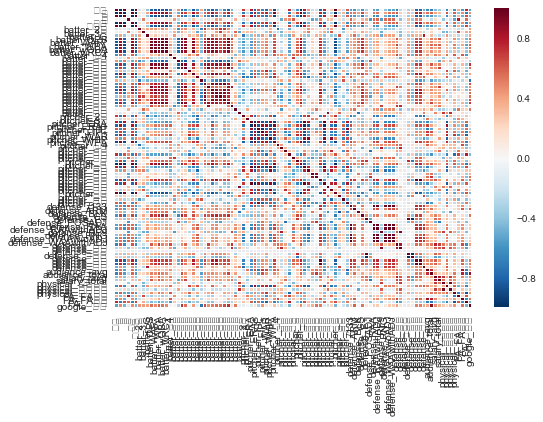

In [94]:
sns.heatmap(correlation_17, annot=False, linewidths=0.01)
plt.figure(figsize=(2000 , 2000))

## Calculate Co-relation from 2011~2017 Dataset

In [18]:
yearlist_classic = range(11, 17+1)
yearlist_NC = range(13, 17+1)
yearlist_kt = range(15, 17+1)

teams_classic = ['KIA', 'LG', 'SK', '넥센', '두산', '삼성', '한화', '롯데']

#### Handle classic teams

In [19]:
for year in yearlist_classic:
    
    team = pd.read_excel(DataPATH + teamPATH + 'team' + str(year) + '.xlsx')
    team = team.drop(['경기수', '연속', '타율', '평균자책점'], axis=1)
    team = team[team['팀명'].isin(teams_classic)]
    team = team.sort_values(by='팀명').set_index('팀명')
    
    batter = pd.read_excel(DataPATH + batterPATH + 'batter' + str(year) + '.xlsx')
    batter = batter.drop(['순'], axis=1)
    batter = batter.rename(columns={'이름': '팀명'})
    batter = batter[batter['팀명'].isin(teams_classic)]
    batter = batter.sort_values(by='팀명').set_index('팀명')
    batter = batter.add_prefix('batter_')
    
    pitcher = pd.read_excel(DataPATH + pitcherPATH + 'pitcher' + str(year) + '.xlsx')
    pitcher = pitcher.drop(['순', '선발'], axis=1)
    pitcher = pitcher.rename(columns={'이름': '팀명'})
    pitcher = pitcher[pitcher['팀명'].isin(teams_classic)]
    pitcher = pitcher.sort_values(by='팀명').set_index('팀명')
    pitcher = pitcher.add_prefix('pitcher_')
    
    defense = pd.read_excel(DataPATH + defensePATH + 'defense' + str(year) + '.xlsx')
    defense = defense.drop(['순'], axis=1)
    defense = defense.rename(columns={'이름': '팀명'})
    defense = defense[defense['팀명'].isin(teams_classic)]
    defense = defense.sort_values(by='팀명').set_index('팀명')
    defense = defense.add_prefix('defense_')
    
    audience = pd.read_excel(DataPATH + audiencePATH + 'audience' + str(year) + '.xlsx')
    audience = audience.drop('Ranking', axis=1)
    audience = audience.rename(columns={'Team': '팀명', 'Audi_avg': 'audience_avg', 'Audi_total': 'audience_total'})
    audience = audience[audience['팀명'].isin(teams_classic)]
    audience = audience.sort_values(by='팀명').set_index('팀명')
    
    salary = pd.read_excel(DataPATH + salaryPATH + 'salary' + str(year) + '.xlsx')
    salary = salary.drop(['순위', '도루실패', '고의4구', '희생번트', '희생플라이'], axis=1)
    salary = salary.rename(columns={'총 연봉(만원)': 'total', '평균 연봉(만원)': 'avg'})
    salary = salary[salary['팀명'].isin(teams_classic)]
    salary = salary.sort_values(by='팀명').set_index('팀명')
    salary = salary.add_prefix('salary_')
    
    physical = pd.read_excel(DataPATH + physicalPATH + 'physical' + str(year) + '.xlsx')
    physical = physical.drop('순위', axis=1)
    physical = physical[physical['팀명'].isin(teams_classic)]
    physical = physical.sort_values(by='팀명').set_index('팀명')
    physical = physical.add_prefix('physical_')
    
    FA = pd.read_excel(DataPATH + FAPATH + 'FA' + str(year) + '.xlsx')
    FA = FA.drop('순위', axis=1)
    FA = FA[FA['팀명'].isin(teams_classic)]
    FA = FA.sort_values(by='팀명').set_index('팀명')
    FA = FA.add_prefix('FA_')
    
    google = pd.read_excel(DataPATH + googlePATH + 'google' + str(year) + '.xlsx')
    google = google.drop(['순위'], axis=1)
    google = google[google['팀명'].isin(teams_classic)]
    google = google.sort_values(by='팀명').set_index('팀명')
    google = google.add_prefix('google_')

    
    combined_classic = pd.merge(team, batter[batter.columns.difference(team.columns)], how='outer', left_index=True, right_index=True)
    combined_classic = pd.merge(combined_classic, pitcher[pitcher.columns.difference(combined_classic.columns)], how='outer', left_index=True, right_index=True)
    combined_classic = pd.merge(combined_classic, defense[defense.columns.difference(combined_classic.columns)], how='outer', left_index=True, right_index=True)
    combined_classic = pd.merge(combined_classic, audience[audience.columns.difference(combined_classic.columns)], how='outer', left_index=True, right_index=True)
    combined_classic = pd.merge(combined_classic, salary[salary.columns.difference(combined_classic.columns)], how='outer', left_index=True, right_index=True)
    combined_classic = pd.merge(combined_classic, physical[physical.columns.difference(combined_classic.columns)], how='outer', left_index=True, right_index=True)
    combined_classic = pd.merge(combined_classic, FA[FA.columns.difference(combined_classic.columns)], how='outer', left_index=True, right_index=True)
    combined_classic = pd.merge(combined_classic, google[google.columns.difference(combined_classic.columns)], how='outer', left_index=True, right_index=True)
        
    if(year == 11):
        total_classic = combined_classic
    else:
        total_classic = total_classic.add(combined_classic, fill_value=0)
    
total_classic = total_classic / 7
total_classic.T

팀명,KIA,LG,SK,넥센,두산,롯데,삼성,한화
순위,5.428571,5.428571e+00,4.571429,4.714286,3.428571e+00,5.285714e+00,3.285714,7.571429
승,65.857143,6.514286e+01,68.285714,69.428571,7.357143e+01,6.757143e+01,74.285714,56.857143
패,68.857143,6.900000e+01,66.000000,65.000000,6.085714e+01,6.600000e+01,59.571429,77.571429
무,1.571429,2.142857e+00,2.000000,1.857143,1.857143e+00,2.714286e+00,2.428571,1.857143
승률,0.486714,4.860000e-01,0.508714,0.516714,5.452857e-01,5.067143e-01,0.557714,0.421143
게임차,17.142857,1.757143e+01,14.500000,13.428571,9.285714e+00,1.485714e+01,8.285714,26.000000
batter_2타,231.571429,2.167143e+02,215.000000,240.714286,2.324286e+02,2.348571e+02,229.428571,217.714286
batter_3타,21.857143,2.300000e+01,17.000000,26.000000,2.614286e+01,2.085714e+01,25.857143,17.857143
batter_G,1767.571429,1.785857e+03,1686.000000,1683.714286,1.688857e+03,1.722286e+03,1704.000000,1761.714286
batter_OPS,0.760571,7.385714e-01,0.766571,0.784857,7.835714e-01,7.664286e-01,0.786857,0.742286


#### NC was borned at 2013

In [20]:
for year in yearlist_NC:
    
    team = pd.read_excel(DataPATH + teamPATH + 'team' + str(year) + '.xlsx')
    team = team.drop(['경기수', '연속', '타율', '평균자책점'], axis=1)
    team = team[team['팀명']==('NC')]
    team = team.sort_values(by='팀명').set_index('팀명')
    
    batter = pd.read_excel(DataPATH + batterPATH + 'batter' + str(year) + '.xlsx')
    batter = batter.drop(['순'], axis=1)
    batter = batter.rename(columns={'이름': '팀명'})
    batter = batter[batter['팀명']==('NC')]
    batter = batter.sort_values(by='팀명').set_index('팀명')
    batter = batter.add_prefix('batter_')
    
    pitcher = pd.read_excel(DataPATH + pitcherPATH + 'pitcher' + str(year) + '.xlsx')
    pitcher = pitcher.drop(['순', '선발'], axis=1)
    pitcher = pitcher.rename(columns={'이름': '팀명'})
    pitcher = pitcher[pitcher['팀명']==('NC')]
    pitcher = pitcher.sort_values(by='팀명').set_index('팀명')
    pitcher = pitcher.add_prefix('pitcher_')
    
    defense = pd.read_excel(DataPATH + defensePATH + 'defense' + str(year) + '.xlsx')
    defense = defense.drop(['순'], axis=1)
    defense = defense.rename(columns={'이름': '팀명'})
    defense = defense[defense['팀명']==('NC')]
    defense = defense.sort_values(by='팀명').set_index('팀명')
    defense = defense.add_prefix('defense_')
    
    audience = pd.read_excel(DataPATH + audiencePATH + 'audience' + str(year) + '.xlsx')
    audience = audience.drop('Ranking', axis=1)
    audience = audience.rename(columns={'Team': '팀명', 'Audi_avg': 'audience_avg', 'Audi_total': 'audience_total'})
    audience = audience[audience['팀명']==('NC')]
    audience = audience.sort_values(by='팀명').set_index('팀명')
    
    salary = pd.read_excel(DataPATH + salaryPATH + 'salary' + str(year) + '.xlsx')
    salary = salary.drop(['순위', '도루실패', '고의4구', '희생번트', '희생플라이'], axis=1)
    salary = salary.rename(columns={'총 연봉(만원)': 'total', '평균 연봉(만원)': 'avg'})
    salary = salary[salary['팀명']==('NC')]
    salary = salary.sort_values(by='팀명').set_index('팀명')
    salary = salary.add_prefix('salary_')
    
    physical = pd.read_excel(DataPATH + physicalPATH + 'physical' + str(year) + '.xlsx')
    physical = physical.drop('순위', axis=1)
    physical = physical[physical['팀명']==('NC')]
    physical = physical.sort_values(by='팀명').set_index('팀명')
    physical = physical.add_prefix('physical_')
    
    FA = pd.read_excel(DataPATH + FAPATH + 'FA' + str(year) + '.xlsx')
    FA = FA.drop('순위', axis=1)
    FA = FA[FA['팀명']==('NC')]
    FA = FA.sort_values(by='팀명').set_index('팀명')
    FA = FA.add_prefix('FA_')
    
    google = pd.read_excel(DataPATH + googlePATH + 'google' + str(year) + '.xlsx')
    google = google.drop(['순위'], axis=1)
    google = google[google['팀명']==('NC')]
    google = google.sort_values(by='팀명').set_index('팀명')
    google = google.add_prefix('google_')

    
    combined_NC = pd.merge(team, batter[batter.columns.difference(team.columns)], how='outer', left_index=True, right_index=True)
    combined_NC = pd.merge(combined_NC, pitcher[pitcher.columns.difference(combined_NC.columns)], how='outer', left_index=True, right_index=True)
    combined_NC = pd.merge(combined_NC, defense[defense.columns.difference(combined_NC.columns)], how='outer', left_index=True, right_index=True)
    combined_NC = pd.merge(combined_NC, audience[audience.columns.difference(combined_NC.columns)], how='outer', left_index=True, right_index=True)
    combined_NC = pd.merge(combined_NC, salary[salary.columns.difference(combined_NC.columns)], how='outer', left_index=True, right_index=True)
    combined_NC = pd.merge(combined_NC, physical[physical.columns.difference(combined_NC.columns)], how='outer', left_index=True, right_index=True)
    combined_NC = pd.merge(combined_NC, FA[FA.columns.difference(combined_NC.columns)], how='outer', left_index=True, right_index=True)
    combined_NC = pd.merge(combined_NC, google[google.columns.difference(combined_NC.columns)], how='outer', left_index=True, right_index=True)
    
    if(year == 13):
        total_NC = combined_NC
    else:
        total_NC = total_NC.add(combined_NC, fill_value=0)
    
total_NC = total_NC / 5
total_NC.T

팀명,NC
순위,3.6000
승,73.6000
패,61.2000
무,2.8000
승률,0.5430
게임차,9.9000
batter_2타,249.2000
batter_3타,25.4000
batter_G,1862.4000
batter_OPS,0.7878


#### kt was borned at 2015

In [21]:
for year in yearlist_kt:
    
    team = pd.read_excel(DataPATH + teamPATH + 'team' + str(year) + '.xlsx')
    team = team.drop(['경기수', '연속', '타율', '평균자책점'], axis=1)
    team = team[team['팀명']==('kt')]
    team = team.sort_values(by='팀명').set_index('팀명')
    
    batter = pd.read_excel(DataPATH + batterPATH +'batter' + str(year) + '.xlsx')
    batter = batter.drop(['순'], axis=1)
    batter = batter.rename(columns={'이름': '팀명'})
    batter = batter[batter['팀명']==('kt')]
    batter = batter.sort_values(by='팀명').set_index('팀명')
    batter = batter.add_prefix('batter_')
    
    pitcher = pd.read_excel(DataPATH + pitcherPATH + 'pitcher' + str(year) + '.xlsx')
    pitcher = pitcher.drop(['순', '선발'], axis=1)
    pitcher = pitcher.rename(columns={'이름': '팀명'})
    pitcher = pitcher[pitcher['팀명']==('kt')]
    pitcher = pitcher.sort_values(by='팀명').set_index('팀명')
    pitcher = pitcher.add_prefix('pitcher_')
    
    defense = pd.read_excel(DataPATH + defensePATH + 'defense' + str(year) + '.xlsx')
    defense = defense.drop(['순'], axis=1)
    defense = defense.rename(columns={'이름': '팀명'})
    defense = defense[defense['팀명']==('kt')]
    defense = defense.sort_values(by='팀명').set_index('팀명')
    defense = defense.add_prefix('defense_')
    
    audience = pd.read_excel(DataPATH + audiencePATH + 'audience' + str(year) + '.xlsx')
    audience = audience.drop('Ranking', axis=1)
    audience = audience.rename(columns={'Team': '팀명', 'Audi_avg': 'audience_avg', 'Audi_total': 'audience_total'})
    audience = audience[audience['팀명']==('kt')]
    audience = audience.sort_values(by='팀명').set_index('팀명')
    
    salary = pd.read_excel(DataPATH + salaryPATH + 'salary' + str(year) + '.xlsx')
    salary = salary.drop(['순위', '도루실패', '고의4구', '희생번트', '희생플라이'], axis=1)
    salary = salary.rename(columns={'총 연봉(만원)': 'total', '평균 연봉(만원)': 'avg'})
    salary = salary[salary['팀명']==('kt')]
    salary = salary.sort_values(by='팀명').set_index('팀명')
    salary = salary.add_prefix('salary_')
    
    physical = pd.read_excel(DataPATH + physicalPATH + 'physical' + str(year) + '.xlsx')
    physical = physical.drop('순위', axis=1)
    physical = physical[physical['팀명']==('kt')]
    physical = physical.sort_values(by='팀명').set_index('팀명')
    physical = physical.add_prefix('physical_')
    
    FA = pd.read_excel(DataPATH + FAPATH + 'FA' + str(year) + '.xlsx')
    FA = FA.drop('순위', axis=1)
    FA = FA[FA['팀명']=='kt']
    FA = FA.sort_values(by='팀명').set_index('팀명')
    FA = FA.add_prefix('FA_')
    
    google = pd.read_excel(DataPATH + googlePATH + 'google' + str(year) + '.xlsx')
    google = google.drop(['순위'], axis=1)
    google = google[google['팀명']==('kt')]
    google = google.sort_values(by='팀명').set_index('팀명')
    google = google.add_prefix('google_')


    
    combined_kt = pd.merge(team, batter[batter.columns.difference(team.columns)], how='outer', left_index=True, right_index=True)
    combined_kt = pd.merge(combined_kt, pitcher[pitcher.columns.difference(combined_kt.columns)], how='outer', left_index=True, right_index=True)
    combined_kt = pd.merge(combined_kt, defense[defense.columns.difference(combined_kt.columns)], how='outer', left_index=True, right_index=True)
    combined_kt = pd.merge(combined_kt, audience[audience.columns.difference(combined_kt.columns)], how='outer', left_index=True, right_index=True)
    combined_kt = pd.merge(combined_kt, salary[salary.columns.difference(combined_kt.columns)], how='outer', left_index=True, right_index=True)
    combined_kt = pd.merge(combined_kt, physical[physical.columns.difference(combined_kt.columns)], how='outer', left_index=True, right_index=True)
    combined_kt = pd.merge(combined_kt, FA[FA.columns.difference(combined_kt.columns)], how='outer', left_index=True, right_index=True)
    combined_kt = pd.merge(combined_kt, google[google.columns.difference(combined_kt.columns)], how='outer', left_index=True, right_index=True)
    
    if(year == 15):
        total_kt = combined_kt
    else:
        total_kt = total_kt.add(combined_kt, fill_value=0)
    
total_kt = total_kt / 3
total_kt.T

팀명,kt
순위,10.000000
승,51.666667
패,91.333333
무,1.000000
승률,0.361333
게임차,37.500000
batter_2타,236.333333
batter_3타,14.333333
batter_G,1916.666667
batter_OPS,0.742667


In [22]:
data = pd.concat([total_classic, total_NC, total_kt])
data.sort_values(by='순위').T

팀명,삼성,두산,NC,SK,넥센,롯데,KIA,LG,한화,kt
순위,3.285714,3.428571e+00,3.6000,4.571429,4.714286,5.285714e+00,5.428571,5.428571e+00,7.571429,10.000000
승,74.285714,7.357143e+01,73.6000,68.285714,69.428571,6.757143e+01,65.857143,6.514286e+01,56.857143,51.666667
패,59.571429,6.085714e+01,61.2000,66.000000,65.000000,6.600000e+01,68.857143,6.900000e+01,77.571429,91.333333
무,2.428571,1.857143e+00,2.8000,2.000000,1.857143,2.714286e+00,1.571429,2.142857e+00,1.857143,1.000000
승률,0.557714,5.452857e-01,0.5430,0.508714,0.516714,5.067143e-01,0.486714,4.860000e-01,0.421143,0.361333
게임차,8.285714,9.285714e+00,9.9000,14.500000,13.428571,1.485714e+01,17.142857,1.757143e+01,26.000000,37.500000
batter_2타,229.428571,2.324286e+02,249.2000,215.000000,240.714286,2.348571e+02,231.571429,2.167143e+02,217.714286,236.333333
batter_3타,25.857143,2.614286e+01,25.4000,17.000000,26.000000,2.085714e+01,21.857143,2.300000e+01,17.857143,14.333333
batter_G,1704.000000,1.688857e+03,1862.4000,1686.000000,1683.714286,1.722286e+03,1767.571429,1.785857e+03,1761.714286,1916.666667
batter_OPS,0.786857,7.835714e-01,0.7878,0.766571,0.784857,7.664286e-01,0.760571,7.385714e-01,0.742286,0.742667


In [23]:
correlation = pd.DataFrame.corr(data)
correlation

,순위,승,패,무,승률,게임차,batter_2타,batter_3타,batter_G,batter_OPS,batter_WAR*,batter_WPA,batter_wOBA,batter_wRC+,batter_고4,batter_도루,batter_도실,batter_득점,batter_루타,batter_병살,batter_볼넷,batter_사구,batter_삼진,batter_안타,batter_장타,batter_출루,batter_타석,batter_타수,batter_타율,batter_타점,batter_홈런,batter_희비,batter_희타,pitcher_2타,pitcher_3타,pitcher_ERA,pitcher_ERA+,pitcher_FIP,pitcher_FIP+,pitcher_WAR,pitcher_WHIP,pitcher_WPA,pitcher_고4,pitcher_보크,pitcher_볼넷,pitcher_사구,pitcher_삼진,pitcher_세,pitcher_승,pitcher_실점,pitcher_안타,pitcher_완봉,pitcher_완투,pitcher_이닝,pitcher_자책,pitcher_출장,pitcher_타자,pitcher_패,pitcher_폭투,pitcher_홀드,pitcher_홈런,defense_/133,defense_ARM,defense_BLK,defense_CS,defense_E+,defense_POSADJ,defense_RAA,defense_RAAwithADJ,defense_RF9,defense_RNG,defense_WAAw/oADJ,defense_WAAwithADJ,defense_기회,defense_보살,defense_선발,defense_수비율,defense_실책,defense_이닝,defense_자살,defense_출장,audience_avg,audience_total,salary_avg,salary_total,physical_평균년차,physical_평균신장,physical_평균연령,physical_평균체중,FA_FA수익,FA_FA지출,FA_순수익,google_검색
순위,1.000000,-0.989418,0.992710,-0.694679,-0.994617,0.995782,-0.151059,-0.823912,0.619700,-0.796390,-0.906045,-0.783220,-0.857095,-0.941845,-0.343268,-0.672439,0.066951,-0.707203,-0.373426,0.545306,-0.492460,-0.682655,0.596598,-0.020191,-0.696325,-0.820044,0.426059,0.545289,-0.647352,-0.684332,-0.405160,-0.502197,0.095046,0.715469,0.768659,0.923303,-0.845615,0.768846,-0.643496,-0.921661,0.893422,-0.913584,0.240453,0.365553,0.638264,0.417603,-0.045679,-0.868207,-0.990207,0.941697,0.886479,0.095933,0.081387,0.612311,0.926060,0.810662,0.881308,0.992710,0.826900,-0.669458,0.562921,-0.902254,-0.607194,-0.869187,-0.506853,-0.886698,0.683762,-0.901537,-0.784742,0.608681,-0.828244,-0.899204,-0.766046,0.621166,0.660910,0.605682,0.582145,0.785519,0.596114,0.595568,0.216171,-0.214441,-0.182508,-0.434840,-0.428825,0.177243,0.074933,0.184830,0.300937,-0.520180,0.187897,-0.596635,-0.337091
승,-0.989418,1.000000,-0.978802,0.691156,0.995568,-0.986381,0.271696,0.842795,-0.567345,0.855620,0.918843,0.795097,0.900614,0.944972,0.342988,0.744203,-0.120803,0.787300,0.488501,-0.491108,0.502003,0.639801,-0.565133,0.143716,0.767068,0.835948,-0.311829,-0.434966,0.720479,0.768642,0.466547,0.546675,-0.213096,-0.624509,-0.695510,-0.904008,0.869616,-0.732470,0.674762,0.920953,-0.870076,0.870233,-0.330194,-0.350175,-0.664878,-0.419612,0.131359,0.847363,0.999945,-0.908666,-0.823055,-0.111721,-0.107950,-0.520667,-0.893617,-0.771981,-0.819836,-0.978802,-0.837911,0.657623,-0.504110,0.870056,0.649853,0.885684,0.495904,0.846103,-0.615601,0.867646,0.708319,-0.518656,0.775016,0.864427,0.687352,-0.531705,-0.576892,-0.513824,-0.489384,-0.715173,-0.504101,-0.503548,-0.160342,0.184337,0.151506,0.337969,0.346364,-0.280661,-0.139954,-0.279432,-0.331085,0.497801,-0.247750,0.621598,0.292157
패,0.992710,-0.978802,1.000000,-0.738864,-0.992332,0.999054,-0.145723,-0.826162,0.653201,-0.778240,-0.904578,-0.789190,-0.854135,-0.943314,-0.419631,-0.637249,0.047077,-0.672797,-0.324236,0.535885,-0.534617,-0.690379,0.569075,0.030216,-0.665687,-0.835448,0.475167,0.594014,-0.619114,-0.645620,-0.365076,-0.431195,0.079355,0.765401,0.810845,0.925879,-0.837099,0.773237,-0.622903,-0.918391,0.881733,-0.927643,0.213546,0.444548,0.624844,0.455282,0.022765,-0.884624,-0.979351,0.951735,0.901010,0.101086,0.106049,0.676765,0.938374,0.825536,0.913660,1.000000,0.808977,-0.685746,0.578405,-0.923872,-0.592118,-0.821430,-0.539340,-0.920939,0.723933,-0.923343,-0.831099,0.662336,-0.859421,-0.921381,-0.813382,0.675057,0.711334,0.660794,0.637320,0.833615,0.651435,0.650846,0.272343,-0.211056,-0.177947,-0.473648,-0.467892,0.132617,0.035465,0.147340,0.208651,-0.513944,0.142926,-0.557647,-0.352598
무,-0.694679,0.691156,-0.738864,1.000000,0.718459,-0.723416,0.176685,0.530521,-0.271196,0.491686,0.521568,0.557640,0.553118,0.564122,0.740738,0.514606,-0.052899,0.423093,0.196736,-0.364737,0.344477,0.599599,-0.085730,0.033247,0.396021,0.583004,-0.271969,-0.346289,0.435390,0.400513,0.158552,0.072909,-0.144516,-0.542181,-0.750985,-0.749376

In [24]:
correlation['승률'].to_frame()

,승률
순위,-0.994617
승,0.995568
패,-0.992332
무,0.718459
승률,1.000000
게임차,-0.996331
batter_2타,0.209421
batter_3타,0.836797
batter_G,-0.617239
batter_OPS,0.825165


In [25]:
data.columns

Index(['순위', '승', '패', '무', '승률', '게임차', 'batter_2타', 'batter_3타', 'batter_G',
       'batter_OPS', 'batter_WAR*', 'batter_WPA', 'batter_wOBA', 'batter_wRC+',
       'batter_고4', 'batter_도루', 'batter_도실', 'batter_득점', 'batter_루타',
       'batter_병살', 'batter_볼넷', 'batter_사구', 'batter_삼진', 'batter_안타',
       'batter_장타', 'batter_출루', 'batter_타석', 'batter_타수', 'batter_타율',
       'batter_타점', 'batter_홈런', 'batter_희비', 'batter_희타', 'pitcher_2타',
       'pitcher_3타', 'pitcher_ERA', 'pitcher_ERA+', 'pitcher_FIP',
       'pitcher_FIP+', 'pitcher_WAR', 'pitcher_WHIP', 'pitcher_WPA',
       'pitcher_고4', 'pitcher_보크', 'pitcher_볼넷', 'pitcher_사구', 'pitcher_삼진',
       'pitcher_세', 'pitcher_승', 'pitcher_실점', 'pitcher_안타', 'pitcher_완봉',
       'pitcher_완투', 'pitcher_이닝', 'pitcher_자책', 'pitcher_출장', 'pitcher_타자',
       'pitcher_패', 'pitcher_폭투', 'pitcher_홀드', 'pitcher_홈런', 'defense_/133',
       'defense_ARM', 'defense_BLK', 'defense_CS', 'defense_E+',
       'defense_POSADJ', 'defense_RAA', 'def

In [26]:
data.index

Index(['KIA', 'LG', 'SK', '넥센', '두산', '롯데', '삼성', '한화', 'NC', 'kt'], dtype='object', name='팀명')

### Normalization?

In [27]:
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_scaled, index = data.index, columns = data.columns)
data_normalized.sort_values(by='순위').T

팀명,삼성,두산,NC,SK,넥센,롯데,KIA,LG,한화,kt
순위,0.000000,0.021277,0.046809,0.191489,0.212766,0.297872,0.319149,0.319149,0.638298,1.000000
승,1.000000,0.968421,0.969684,0.734737,0.785263,0.703158,0.627368,0.595789,0.229474,0.000000
패,0.000000,0.040480,0.051274,0.202399,0.170915,0.202399,0.292354,0.296852,0.566717,1.000000
무,0.793651,0.476190,1.000000,0.555556,0.476190,0.952381,0.317460,0.634921,0.476190,0.000000
승률,1.000000,0.936712,0.925073,0.750485,0.791222,0.740301,0.638458,0.634821,0.304559,0.000000
게임차,0.000000,0.034230,0.055257,0.212714,0.176039,0.224939,0.303178,0.317848,0.606357,1.000000
batter_2타,0.421888,0.509607,1.000000,0.000000,0.751880,0.580618,0.484545,0.050125,0.079365,0.623782
batter_3타,0.975806,1.000000,0.937097,0.225806,0.987903,0.552419,0.637097,0.733871,0.298387,0.000000
batter_G,0.087081,0.022077,0.767048,0.009812,0.000000,0.165576,0.359975,0.438471,0.334832,1.000000
batter_OPS,0.980847,0.914103,1.000000,0.568775,0.940221,0.565873,0.446895,0.000000,0.075450,0.083188


In [28]:
correlation_normalized = pd.DataFrame.corr(data_normalized)
correlation_normalized

,순위,승,패,무,승률,게임차,batter_2타,batter_3타,batter_G,batter_OPS,batter_WAR*,batter_WPA,batter_wOBA,batter_wRC+,batter_고4,batter_도루,batter_도실,batter_득점,batter_루타,batter_병살,batter_볼넷,batter_사구,batter_삼진,batter_안타,batter_장타,batter_출루,batter_타석,batter_타수,batter_타율,batter_타점,batter_홈런,batter_희비,batter_희타,pitcher_2타,pitcher_3타,pitcher_ERA,pitcher_ERA+,pitcher_FIP,pitcher_FIP+,pitcher_WAR,pitcher_WHIP,pitcher_WPA,pitcher_고4,pitcher_보크,pitcher_볼넷,pitcher_사구,pitcher_삼진,pitcher_세,pitcher_승,pitcher_실점,pitcher_안타,pitcher_완봉,pitcher_완투,pitcher_이닝,pitcher_자책,pitcher_출장,pitcher_타자,pitcher_패,pitcher_폭투,pitcher_홀드,pitcher_홈런,defense_/133,defense_ARM,defense_BLK,defense_CS,defense_E+,defense_POSADJ,defense_RAA,defense_RAAwithADJ,defense_RF9,defense_RNG,defense_WAAw/oADJ,defense_WAAwithADJ,defense_기회,defense_보살,defense_선발,defense_수비율,defense_실책,defense_이닝,defense_자살,defense_출장,audience_avg,audience_total,salary_avg,salary_total,physical_평균년차,physical_평균신장,physical_평균연령,physical_평균체중,FA_FA수익,FA_FA지출,FA_순수익,google_검색
순위,1.000000,-0.989418,0.992710,-0.694679,-0.994617,0.995782,-0.151059,-0.823912,0.619700,-0.796390,-0.906045,-0.783220,-0.857095,-0.941845,-0.343268,-0.672439,0.066951,-0.707203,-0.373426,0.545306,-0.492460,-0.682655,0.596598,-0.020191,-0.696325,-0.820044,0.426059,0.545289,-0.647352,-0.684332,-0.405160,-0.502197,0.095046,0.715469,0.768659,0.923303,-0.845615,0.768846,-0.643496,-0.921661,0.893422,-0.913584,0.240453,0.365553,0.638264,0.417603,-0.045679,-0.868207,-0.990207,0.941697,0.886479,0.095933,0.081387,0.612311,0.926060,0.810662,0.881308,0.992710,0.826900,-0.669458,0.562921,-0.902254,-0.607194,-0.869187,-0.506853,-0.886698,0.683762,-0.901537,-0.784742,0.608681,-0.828244,-0.899204,-0.766046,0.621166,0.660910,0.605682,0.582145,0.785519,0.596114,0.595568,0.216171,-0.214441,-0.182508,-0.434840,-0.428825,0.177243,0.074933,0.184830,0.300937,-0.520180,0.187897,-0.596635,-0.337091
승,-0.989418,1.000000,-0.978802,0.691156,0.995568,-0.986381,0.271696,0.842795,-0.567345,0.855620,0.918843,0.795097,0.900614,0.944972,0.342988,0.744203,-0.120803,0.787300,0.488501,-0.491108,0.502003,0.639801,-0.565133,0.143716,0.767068,0.835948,-0.311829,-0.434966,0.720479,0.768642,0.466547,0.546675,-0.213096,-0.624509,-0.695510,-0.904008,0.869616,-0.732470,0.674762,0.920953,-0.870076,0.870233,-0.330194,-0.350175,-0.664878,-0.419612,0.131359,0.847363,0.999945,-0.908666,-0.823055,-0.111721,-0.107950,-0.520667,-0.893617,-0.771981,-0.819836,-0.978802,-0.837911,0.657623,-0.504110,0.870056,0.649853,0.885684,0.495904,0.846103,-0.615601,0.867646,0.708319,-0.518656,0.775016,0.864427,0.687352,-0.531705,-0.576892,-0.513824,-0.489384,-0.715173,-0.504101,-0.503548,-0.160342,0.184337,0.151506,0.337969,0.346364,-0.280661,-0.139954,-0.279432,-0.331085,0.497801,-0.247750,0.621598,0.292157
패,0.992710,-0.978802,1.000000,-0.738864,-0.992332,0.999054,-0.145723,-0.826162,0.653201,-0.778240,-0.904578,-0.789190,-0.854135,-0.943314,-0.419631,-0.637249,0.047077,-0.672797,-0.324236,0.535885,-0.534617,-0.690379,0.569075,0.030216,-0.665687,-0.835448,0.475167,0.594014,-0.619114,-0.645620,-0.365076,-0.431195,0.079355,0.765401,0.810845,0.925879,-0.837099,0.773237,-0.622903,-0.918391,0.881733,-0.927643,0.213546,0.444548,0.624844,0.455282,0.022765,-0.884624,-0.979351,0.951735,0.901010,0.101086,0.106049,0.676765,0.938374,0.825536,0.913660,1.000000,0.808977,-0.685746,0.578405,-0.923872,-0.592118,-0.821430,-0.539340,-0.920939,0.723933,-0.923343,-0.831099,0.662336,-0.859421,-0.921381,-0.813382,0.675057,0.711334,0.660794,0.637320,0.833615,0.651435,0.650846,0.272343,-0.211056,-0.177947,-0.473648,-0.467892,0.132617,0.035465,0.147340,0.208651,-0.513944,0.142926,-0.557647,-0.352598
무,-0.694679,0.691156,-0.738864,1.000000,0.718459,-0.723416,0.176685,0.530521,-0.271196,0.491686,0.521568,0.557640,0.553118,0.564122,0.740738,0.514606,-0.052899,0.423093,0.196736,-0.364737,0.344477,0.599599,-0.085730,0.033247,0.396021,0.583004,-0.271969,-0.346289,0.435390,0.400513,0.158552,0.072909,-0.144516,-0.542181,-0.750985,-0.749376

In [29]:
correlation_normalized['승률'].to_frame()

,승률
순위,-0.994617
승,0.995568
패,-0.992332
무,0.718459
승률,1.000000
게임차,-0.996331
batter_2타,0.209421
batter_3타,0.836797
batter_G,-0.617239
batter_OPS,0.825165


## Data Prediction

### Predict 2017 Data with Co-relation(calculated with 2011~2016) and 2016 Data

#### Co-relation(calculated with 2011~2016)

In [30]:
correlation_normalized

,순위,승,패,무,승률,게임차,batter_2타,batter_3타,batter_G,batter_OPS,batter_WAR*,batter_WPA,batter_wOBA,batter_wRC+,batter_고4,batter_도루,batter_도실,batter_득점,batter_루타,batter_병살,batter_볼넷,batter_사구,batter_삼진,batter_안타,batter_장타,batter_출루,batter_타석,batter_타수,batter_타율,batter_타점,batter_홈런,batter_희비,batter_희타,pitcher_2타,pitcher_3타,pitcher_ERA,pitcher_ERA+,pitcher_FIP,pitcher_FIP+,pitcher_WAR,pitcher_WHIP,pitcher_WPA,pitcher_고4,pitcher_보크,pitcher_볼넷,pitcher_사구,pitcher_삼진,pitcher_세,pitcher_승,pitcher_실점,pitcher_안타,pitcher_완봉,pitcher_완투,pitcher_이닝,pitcher_자책,pitcher_출장,pitcher_타자,pitcher_패,pitcher_폭투,pitcher_홀드,pitcher_홈런,defense_/133,defense_ARM,defense_BLK,defense_CS,defense_E+,defense_POSADJ,defense_RAA,defense_RAAwithADJ,defense_RF9,defense_RNG,defense_WAAw/oADJ,defense_WAAwithADJ,defense_기회,defense_보살,defense_선발,defense_수비율,defense_실책,defense_이닝,defense_자살,defense_출장,audience_avg,audience_total,salary_avg,salary_total,physical_평균년차,physical_평균신장,physical_평균연령,physical_평균체중,FA_FA수익,FA_FA지출,FA_순수익,google_검색
순위,1.000000,-0.989418,0.992710,-0.694679,-0.994617,0.995782,-0.151059,-0.823912,0.619700,-0.796390,-0.906045,-0.783220,-0.857095,-0.941845,-0.343268,-0.672439,0.066951,-0.707203,-0.373426,0.545306,-0.492460,-0.682655,0.596598,-0.020191,-0.696325,-0.820044,0.426059,0.545289,-0.647352,-0.684332,-0.405160,-0.502197,0.095046,0.715469,0.768659,0.923303,-0.845615,0.768846,-0.643496,-0.921661,0.893422,-0.913584,0.240453,0.365553,0.638264,0.417603,-0.045679,-0.868207,-0.990207,0.941697,0.886479,0.095933,0.081387,0.612311,0.926060,0.810662,0.881308,0.992710,0.826900,-0.669458,0.562921,-0.902254,-0.607194,-0.869187,-0.506853,-0.886698,0.683762,-0.901537,-0.784742,0.608681,-0.828244,-0.899204,-0.766046,0.621166,0.660910,0.605682,0.582145,0.785519,0.596114,0.595568,0.216171,-0.214441,-0.182508,-0.434840,-0.428825,0.177243,0.074933,0.184830,0.300937,-0.520180,0.187897,-0.596635,-0.337091
승,-0.989418,1.000000,-0.978802,0.691156,0.995568,-0.986381,0.271696,0.842795,-0.567345,0.855620,0.918843,0.795097,0.900614,0.944972,0.342988,0.744203,-0.120803,0.787300,0.488501,-0.491108,0.502003,0.639801,-0.565133,0.143716,0.767068,0.835948,-0.311829,-0.434966,0.720479,0.768642,0.466547,0.546675,-0.213096,-0.624509,-0.695510,-0.904008,0.869616,-0.732470,0.674762,0.920953,-0.870076,0.870233,-0.330194,-0.350175,-0.664878,-0.419612,0.131359,0.847363,0.999945,-0.908666,-0.823055,-0.111721,-0.107950,-0.520667,-0.893617,-0.771981,-0.819836,-0.978802,-0.837911,0.657623,-0.504110,0.870056,0.649853,0.885684,0.495904,0.846103,-0.615601,0.867646,0.708319,-0.518656,0.775016,0.864427,0.687352,-0.531705,-0.576892,-0.513824,-0.489384,-0.715173,-0.504101,-0.503548,-0.160342,0.184337,0.151506,0.337969,0.346364,-0.280661,-0.139954,-0.279432,-0.331085,0.497801,-0.247750,0.621598,0.292157
패,0.992710,-0.978802,1.000000,-0.738864,-0.992332,0.999054,-0.145723,-0.826162,0.653201,-0.778240,-0.904578,-0.789190,-0.854135,-0.943314,-0.419631,-0.637249,0.047077,-0.672797,-0.324236,0.535885,-0.534617,-0.690379,0.569075,0.030216,-0.665687,-0.835448,0.475167,0.594014,-0.619114,-0.645620,-0.365076,-0.431195,0.079355,0.765401,0.810845,0.925879,-0.837099,0.773237,-0.622903,-0.918391,0.881733,-0.927643,0.213546,0.444548,0.624844,0.455282,0.022765,-0.884624,-0.979351,0.951735,0.901010,0.101086,0.106049,0.676765,0.938374,0.825536,0.913660,1.000000,0.808977,-0.685746,0.578405,-0.923872,-0.592118,-0.821430,-0.539340,-0.920939,0.723933,-0.923343,-0.831099,0.662336,-0.859421,-0.921381,-0.813382,0.675057,0.711334,0.660794,0.637320,0.833615,0.651435,0.650846,0.272343,-0.211056,-0.177947,-0.473648,-0.467892,0.132617,0.035465,0.147340,0.208651,-0.513944,0.142926,-0.557647,-0.352598
무,-0.694679,0.691156,-0.738864,1.000000,0.718459,-0.723416,0.176685,0.530521,-0.271196,0.491686,0.521568,0.557640,0.553118,0.564122,0.740738,0.514606,-0.052899,0.423093,0.196736,-0.364737,0.344477,0.599599,-0.085730,0.033247,0.396021,0.583004,-0.271969,-0.346289,0.435390,0.400513,0.158552,0.072909,-0.144516,-0.542181,-0.750985,-0.749376

#### 2016 Data

In [31]:
# Handle Classic Teams
year = 16
    
team = pd.read_excel(DataPATH + teamPATH + 'team' + str(year) + '.xlsx')
team = team.drop(['경기수', '연속', '타율', '평균자책점'], axis=1)
team = team[team['팀명'].isin(teams_classic)]
team = team.sort_values(by='팀명').set_index('팀명')
    
batter = pd.read_excel(DataPATH + batterPATH + 'batter' + str(year) + '.xlsx')
batter = batter.drop(['순'], axis=1)
batter = batter.rename(columns={'이름': '팀명'})
batter = batter[batter['팀명'].isin(teams_classic)]
batter = batter.sort_values(by='팀명').set_index('팀명')
batter = batter.add_prefix('batter_')
    
pitcher = pd.read_excel(DataPATH + pitcherPATH + 'pitcher' + str(year) + '.xlsx')
pitcher = pitcher.drop(['순', '선발'], axis=1)
pitcher = pitcher.rename(columns={'이름': '팀명'})
pitcher = pitcher[pitcher['팀명'].isin(teams_classic)]
pitcher = pitcher.sort_values(by='팀명').set_index('팀명')
pitcher = pitcher.add_prefix('pitcher_')
    
defense = pd.read_excel(DataPATH + defensePATH + 'defense' + str(year) + '.xlsx')
defense = defense.drop(['순'], axis=1)
defense = defense.rename(columns={'이름': '팀명'})
defense = defense[defense['팀명'].isin(teams_classic)]
defense = defense.sort_values(by='팀명').set_index('팀명')
defense = defense.add_prefix('defense_')
    
audience = pd.read_excel(DataPATH + audiencePATH + 'audience' + str(year) + '.xlsx')
audience = audience.drop('Ranking', axis=1)
audience = audience.rename(columns={'Team': '팀명', 'Audi_avg': 'audience_avg', 'Audi_total': 'audience_total'})
audience = audience[audience['팀명'].isin(teams_classic)]
audience = audience.sort_values(by='팀명').set_index('팀명')
    
salary = pd.read_excel(DataPATH + salaryPATH + 'salary' + str(year) + '.xlsx')
salary = salary.drop(['순위', '도루실패', '고의4구', '희생번트', '희생플라이'], axis=1)
salary = salary.rename(columns={'총 연봉(만원)': 'total', '평균 연봉(만원)': 'avg'})
salary = salary[salary['팀명'].isin(teams_classic)]
salary = salary.sort_values(by='팀명').set_index('팀명')
salary = salary.add_prefix('salary_')
    
physical = pd.read_excel(DataPATH + physicalPATH + 'physical' + str(year) + '.xlsx')
physical = physical.drop('순위', axis=1)
physical = physical[physical['팀명'].isin(teams_classic)]
physical = physical.sort_values(by='팀명').set_index('팀명')
physical = physical.add_prefix('physical_')
    
FA = pd.read_excel(DataPATH + FAPATH + 'FA' + str(year) + '.xlsx')
FA = FA.drop('순위', axis=1)
FA = FA[FA['팀명'].isin(teams_classic)]
FA = FA.sort_values(by='팀명').set_index('팀명')
FA = FA.add_prefix('FA_')
    
google = pd.read_excel(DataPATH + googlePATH + 'google' + str(year) + '.xlsx')
google = google.drop(['순위'], axis=1)
google = google[google['팀명'].isin(teams_classic)]
google = google.sort_values(by='팀명').set_index('팀명')
google = google.add_prefix('google_')

    
combined_classic = pd.merge(team, batter[batter.columns.difference(team.columns)], how='outer', left_index=True, right_index=True)
combined_classic = pd.merge(combined_classic, pitcher[pitcher.columns.difference(combined_classic.columns)], how='outer', left_index=True, right_index=True)
combined_classic = pd.merge(combined_classic, defense[defense.columns.difference(combined_classic.columns)], how='outer', left_index=True, right_index=True)
combined_classic = pd.merge(combined_classic, audience[audience.columns.difference(combined_classic.columns)], how='outer', left_index=True, right_index=True)
combined_classic = pd.merge(combined_classic, salary[salary.columns.difference(combined_classic.columns)], how='outer', left_index=True, right_index=True)
combined_classic = pd.merge(combined_classic, physical[physical.columns.difference(combined_classic.columns)], how='outer', left_index=True, right_index=True)
combined_classic = pd.merge(combined_classic, FA[FA.columns.difference(combined_classic.columns)], how='outer', left_index=True, right_index=True)
combined_classic = pd.merge(combined_classic, google[google.columns.difference(combined_classic.columns)], how='outer', left_index=True, right_index=True)
    

total_classic2 = combined_classic

        

In [32]:
year = 16
    
team = pd.read_excel(DataPATH + teamPATH + 'team' + str(year) + '.xlsx')
team = team.drop(['경기수', '연속', '타율', '평균자책점'], axis=1)
team = team[team['팀명']==('NC')]
team = team.sort_values(by='팀명').set_index('팀명')
    
batter = pd.read_excel(DataPATH + batterPATH + 'batter' + str(year) + '.xlsx')
batter = batter.drop(['순'], axis=1)
batter = batter.rename(columns={'이름': '팀명'})
batter = batter[batter['팀명']==('NC')]
batter = batter.sort_values(by='팀명').set_index('팀명')
batter = batter.add_prefix('batter_')
    
pitcher = pd.read_excel(DataPATH + pitcherPATH + 'pitcher' + str(year) + '.xlsx')
pitcher = pitcher.drop(['순', '선발'], axis=1)
pitcher = pitcher.rename(columns={'이름': '팀명'})
pitcher = pitcher[pitcher['팀명']==('NC')]
pitcher = pitcher.sort_values(by='팀명').set_index('팀명')
pitcher = pitcher.add_prefix('pitcher_')
    
defense = pd.read_excel(DataPATH + defensePATH + 'defense' + str(year) + '.xlsx')
defense = defense.drop(['순'], axis=1)
defense = defense.rename(columns={'이름': '팀명'})
defense = defense[defense['팀명']==('NC')]
defense = defense.sort_values(by='팀명').set_index('팀명')
defense = defense.add_prefix('defense_')
    
audience = pd.read_excel(DataPATH + audiencePATH + 'audience' + str(year) + '.xlsx')
audience = audience.drop('Ranking', axis=1)
audience = audience.rename(columns={'Team': '팀명', 'Audi_avg': 'audience_avg', 'Audi_total': 'audience_total'})
audience = audience[audience['팀명']==('NC')]
audience = audience.sort_values(by='팀명').set_index('팀명')
    
salary = pd.read_excel(DataPATH + salaryPATH + 'salary' + str(year) + '.xlsx')
salary = salary.drop(['순위', '도루실패', '고의4구', '희생번트', '희생플라이'], axis=1)
salary = salary.rename(columns={'총 연봉(만원)': 'total', '평균 연봉(만원)': 'avg'})
salary = salary[salary['팀명']==('NC')]
salary = salary.sort_values(by='팀명').set_index('팀명')
salary = salary.add_prefix('salary_')
    
physical = pd.read_excel(DataPATH + physicalPATH + 'physical' + str(year) + '.xlsx')
physical = physical.drop('순위', axis=1)
physical = physical[physical['팀명']==('NC')]
physical = physical.sort_values(by='팀명').set_index('팀명')
physical = physical.add_prefix('physical_')

FA = pd.read_excel(DataPATH + FAPATH + 'FA' + str(year) + '.xlsx')
FA = FA.drop('순위', axis=1)
FA = FA[FA['팀명']==('NC')]
FA = FA.sort_values(by='팀명').set_index('팀명')
FA = FA.add_prefix('FA_')
    
google = pd.read_excel(DataPATH + googlePATH + 'google' + str(year) + '.xlsx')
google = google.drop(['순위'], axis=1)
google = google[google['팀명']==('NC')]
google = google.sort_values(by='팀명').set_index('팀명')
google = google.add_prefix('google_')

    
combined_NC = pd.merge(team, batter[batter.columns.difference(team.columns)], how='outer', left_index=True, right_index=True)
combined_NC = pd.merge(combined_NC, pitcher[pitcher.columns.difference(combined_NC.columns)], how='outer', left_index=True, right_index=True)
combined_NC = pd.merge(combined_NC, defense[defense.columns.difference(combined_NC.columns)], how='outer', left_index=True, right_index=True)
combined_NC = pd.merge(combined_NC, audience[audience.columns.difference(combined_NC.columns)], how='outer', left_index=True, right_index=True)
combined_NC = pd.merge(combined_NC, salary[salary.columns.difference(combined_NC.columns)], how='outer', left_index=True, right_index=True)
combined_NC = pd.merge(combined_NC, physical[physical.columns.difference(combined_NC.columns)], how='outer', left_index=True, right_index=True)
combined_NC = pd.merge(combined_NC, FA[FA.columns.difference(combined_NC.columns)], how='outer', left_index=True, right_index=True)
combined_NC = pd.merge(combined_NC, google[google.columns.difference(combined_NC.columns)], how='outer', left_index=True, right_index=True)
    
total_NC2 = combined_NC

In [33]:
year = 16
    
team = pd.read_excel(DataPATH + teamPATH + 'team' + str(year) + '.xlsx')
team = team.drop(['경기수', '연속', '타율', '평균자책점'], axis=1)
team = team[team['팀명']==('kt')]
team = team.sort_values(by='팀명').set_index('팀명')
    
batter = pd.read_excel(DataPATH + batterPATH +'batter' + str(year) + '.xlsx')
batter = batter.drop(['순'], axis=1)
batter = batter.rename(columns={'이름': '팀명'})
batter = batter[batter['팀명']==('kt')]
batter = batter.sort_values(by='팀명').set_index('팀명')
batter = batter.add_prefix('batter_')
    
pitcher = pd.read_excel(DataPATH + pitcherPATH + 'pitcher' + str(year) + '.xlsx')
pitcher = pitcher.drop(['순', '선발'], axis=1)
pitcher = pitcher.rename(columns={'이름': '팀명'})
pitcher = pitcher[pitcher['팀명']==('kt')]
pitcher = pitcher.sort_values(by='팀명').set_index('팀명')
pitcher = pitcher.add_prefix('pitcher_')
    
defense = pd.read_excel(DataPATH + defensePATH + 'defense' + str(year) + '.xlsx')
defense = defense.drop(['순'], axis=1)
defense = defense.rename(columns={'이름': '팀명'})
defense = defense[defense['팀명']==('kt')]
defense = defense.sort_values(by='팀명').set_index('팀명')
defense = defense.add_prefix('defense_')
    
audience = pd.read_excel(DataPATH + audiencePATH + 'audience' + str(year) + '.xlsx')
audience = audience.drop('Ranking', axis=1)
audience = audience.rename(columns={'Team': '팀명', 'Audi_avg': 'audience_avg', 'Audi_total': 'audience_total'})
audience = audience[audience['팀명']==('kt')]
audience = audience.sort_values(by='팀명').set_index('팀명')
    
salary = pd.read_excel(DataPATH + salaryPATH + 'salary' + str(year) + '.xlsx')
salary = salary.drop(['순위', '도루실패', '고의4구', '희생번트', '희생플라이'], axis=1)
salary = salary.rename(columns={'총 연봉(만원)': 'total', '평균 연봉(만원)': 'avg'})
salary = salary[salary['팀명']==('kt')]
salary = salary.sort_values(by='팀명').set_index('팀명')
salary = salary.add_prefix('salary_')
    
physical = pd.read_excel(DataPATH + physicalPATH + 'physical' + str(year) + '.xlsx')
physical = physical.drop('순위', axis=1)
physical = physical[physical['팀명']==('kt')]
physical = physical.sort_values(by='팀명').set_index('팀명')
physical = physical.add_prefix('physical_')
    
FA = pd.read_excel(DataPATH + FAPATH + 'FA' + str(year) + '.xlsx')
FA = FA.drop('순위', axis=1)
FA = FA[FA['팀명']=='kt']
FA = FA.sort_values(by='팀명').set_index('팀명')
FA = FA.add_prefix('FA_')
    
google = pd.read_excel(DataPATH + googlePATH + 'google' + str(year) + '.xlsx')
google = google.drop(['순위'], axis=1)
google = google[google['팀명']==('kt')]
google = google.sort_values(by='팀명').set_index('팀명')
google = google.add_prefix('google_')


    
combined_kt = pd.merge(team, batter[batter.columns.difference(team.columns)], how='outer', left_index=True, right_index=True)
combined_kt = pd.merge(combined_kt, pitcher[pitcher.columns.difference(combined_kt.columns)], how='outer', left_index=True, right_index=True)
combined_kt = pd.merge(combined_kt, defense[defense.columns.difference(combined_kt.columns)], how='outer', left_index=True, right_index=True)
combined_kt = pd.merge(combined_kt, audience[audience.columns.difference(combined_kt.columns)], how='outer', left_index=True, right_index=True)
combined_kt = pd.merge(combined_kt, salary[salary.columns.difference(combined_kt.columns)], how='outer', left_index=True, right_index=True)
combined_kt = pd.merge(combined_kt, physical[physical.columns.difference(combined_kt.columns)], how='outer', left_index=True, right_index=True)
combined_kt = pd.merge(combined_kt, FA[FA.columns.difference(combined_kt.columns)], how='outer', left_index=True, right_index=True)
combined_kt = pd.merge(combined_kt, google[google.columns.difference(combined_kt.columns)], how='outer', left_index=True, right_index=True)
    
total_kt2 = combined_kt

In [96]:
data16 = pd.concat([total_classic2, total_NC2, total_kt2])

print(data16.shape)
data16

(10, 93)


,순위,승,패,무,승률,게임차,batter_2타,batter_3타,batter_G,batter_OPS,batter_WAR*,batter_WPA,batter_wOBA,batter_wRC+,batter_고4,batter_도루,batter_도실,batter_득점,batter_루타,batter_병살,batter_볼넷,batter_사구,batter_삼진,batter_안타,batter_장타,batter_출루,batter_타석,batter_타수,batter_타율,batter_타점,batter_홈런,batter_희비,batter_희타,pitcher_2타,pitcher_3타,pitcher_ERA,pitcher_ERA+,pitcher_FIP,pitcher_FIP+,pitcher_WAR,pitcher_WHIP,pitcher_WPA,pitcher_고4,pitcher_보크,pitcher_볼넷,pitcher_사구,pitcher_삼진,pitcher_세,pitcher_승,pitcher_실점,pitcher_안타,pitcher_완봉,pitcher_완투,pitcher_이닝,pitcher_자책,pitcher_출장,pitcher_타자,pitcher_패,pitcher_폭투,pitcher_홀드,pitcher_홈런,defense_/133,defense_ARM,defense_BLK,defense_CS,defense_E+,defense_POSADJ,defense_RAA,defense_RAAwithADJ,defense_RF9,defense_RNG,defense_WAAw/oADJ,defense_WAAwithADJ,defense_기회,defense_보살,defense_선발,defense_수비율,defense_실책,defense_이닝,defense_자살,defense_출장,audience_avg,audience_total,salary_avg,salary_total,physical_평균년차,physical_평균신장,physical_평균연령,physical_평균체중,FA_FA수익,FA_FA지출,FA_순수익,google_검색
팀명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KIA,5,70,73,1,0.490,23.0,264,28,1924,0.810,21.40,10.68,0.360,99.6,12,101,50,803,2259,109,499,87,997,1429,0.452,0.358,5696,4999,0.286,754,170,45,66,230,23,4.99,103.7,5.03,103.8,19.63,1.58,-12.19,18,7,561,59,965,38,71,785,1456,1,7,1276.0,708,635,5771,73,69,74,131,-1.15,-6.35,0.89,-11.45,-1.46,-0.26,-11.13,-11.29,4.13,7.24,-0.949,-0.949,5418,1448,1314,0.979,113,11571,3857,2262,10743,773499,19611,529500,8.7,182.9,27.4,89.6,0,360000,-360000,142000
LG,4,71,71,2,0.500,21.5,238,26,1936,0.779,20.29,13.27,0.352,98.0,10,121,70,786,2108,92,523,72,982,1464,0.417,0.361,5765,5051,0.290,744,118,54,65,243,23,5.10,99.8,5.06,99.0,14.32,1.53,-13.17,27,1,539,109,909,34,71,807,1426,2,2,1287.2,729,676,5782,71,84,75,122,2.11,-3.67,-2.97,2.32,0.11,-0.11,20.55,20.74,4.23,24.76,1.861,1.861,5584,1588,1314,0.981,106,11670,3890,2334,16078,1157646,22956,619800,8.6,183.1,28.0,85.2,0,620000,-620000,142000
SK,6,69,75,0,0.479,24.5,234,19,1834,0.811,20.23,7.56,0.359,100.1,13,89,60,753,2282,104,429,102,1018,1464,0.454,0.356,5672,5023,0.291,715,182,47,71,232,22,4.94,105.7,5.23,100.3,18.28,1.50,-10.56,18,7,527,76,945,31,69,784,1386,0,1,1274.0,699,600,5659,75,65,43,151,1.40,-4.41,1.66,3.25,-3.51,0.06,13.49,13.27,4.32,16.50,1.210,1.210,5671,1699,1314,0.978,123,11547,3849,2131,12017,865194,23100,623700,8.7,182.5,27.5,86.1,1540000,460000,1080000,141000
넥센,3,77,66,1,0.538,16.0,254,39,1780,0.808,23.47,16.99,0.364,100.8,17,154,83,813,2198,121,556,63,956,1464,0.440,0.368,5702,4990,0.293,765,134,59,34,249,27,4.96,106.0,5.11,101.4,21.57,1.50,-11.47,3,3,435,68,895,39,77,757,1487,0,0,1280.1,705,608,5684,66,50,74,152,0.37,-8.01,3.34,4.04,2.10,-0.21,3.54,3.33,4.13,2.07,0.337,0.337,5386,1451,1305,0.983,94,11523,3841,2095,10863,782121,12600,340200,7.3,182.4,25.6,88.2,600000,412000,188000,142000
두산,1,93,50,1,0.650,0.0,284,25,1812,0.851,34.81,23.69,0.379,116.8,11,85,45,935,2387,121,600,86,884,1504,0.473,0.378,5841,5044,0.298,877,183,68,43,246,30,4.46,114.6,4.96,101.0,24.93,1.46,-2.18,7,4,498,77,982,36,93,682,1385,2,2,1287.2,638,579,5658,50,66,55,136,2.39,7.93,1.69,0.03,5.11,0.60,23.28,23.92,4.18,8.53,2.108,2.201,5505,1534,1314,0.985,81,11670,3890,2079,16181,1165020,22156,598200,7.7,182.9,26.9,84.1,0,430000,-430000,142000
롯데,8,66,78,0,0.458,27.5,252,20,1840,0.793,21.46,14.15,0.359,100.4,18,145,64,777,2112,120,596,83,1061,1439,0.422,0.370,5784,5001,0.288,732,127,41,62,276,32,5.63,92.8,5.36,97.5,11.08,1.64,-20.15,27,5,585,78,1009,27,66,865,1486,2,3,1266.1,792,669,5785,79,82,59,161,0.91,-5.01,-3.83,5.24,2.47,4.47,8.70,13.17,4.22,9.83,0.796,1.202,5434,1544,1305,0.983,91,11397,3799,2077,11842,852639,23585,636800,8.8,183.9,27.5,89.9,130000,1380000,-1250000,143000
삼성,9,65,78,1,0.455,28.0,249,34,1808,0.806,22.21,13.64,0.360,100.1,15,104,50,852,2235,119,552,75,864,1492,0.439,0.367,5863,5093,0.293,792,142,55,88,251,20,5.64,93.4,5.69,91.7,12.55,1.58,-20.19,6,8,518,87,935,34,65,869,1507,0,2,1282.1,804,647,5799,78,52

In [35]:
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled_16 = min_max_scaler.fit_transform(data16)
data_normalized_16 = pd.DataFrame(data_scaled_16, index = data16.index, columns = data16.columns)

data_normalized_16

,순위,승,패,무,승률,게임차,batter_2타,batter_3타,batter_G,batter_OPS,batter_WAR*,batter_WPA,batter_wOBA,batter_wRC+,batter_고4,batter_도루,batter_도실,batter_득점,batter_루타,batter_병살,batter_볼넷,batter_사구,batter_삼진,batter_안타,batter_장타,batter_출루,batter_타석,batter_타수,batter_타율,batter_타점,batter_홈런,batter_희비,batter_희타,pitcher_2타,pitcher_3타,pitcher_ERA,pitcher_ERA+,pitcher_FIP,pitcher_FIP+,pitcher_WAR,pitcher_WHIP,pitcher_WPA,pitcher_고4,pitcher_보크,pitcher_볼넷,pitcher_사구,pitcher_삼진,pitcher_세,pitcher_승,pitcher_실점,pitcher_안타,pitcher_완봉,pitcher_완투,pitcher_이닝,pitcher_자책,pitcher_출장,pitcher_타자,pitcher_패,pitcher_폭투,pitcher_홀드,pitcher_홈런,defense_/133,defense_ARM,defense_BLK,defense_CS,defense_E+,defense_POSADJ,defense_RAA,defense_RAAwithADJ,defense_RF9,defense_RNG,defense_WAAw/oADJ,defense_WAAwithADJ,defense_기회,defense_보살,defense_선발,defense_수비율,defense_실책,defense_이닝,defense_자살,defense_출장,audience_avg,audience_total,salary_avg,salary_total,physical_평균년차,physical_평균신장,physical_평균연령,physical_평균체중,FA_FA수익,FA_FA지출,FA_순수익,google_검색
팀명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KIA,0.444444,0.425,0.589744,0.333333,0.422383,0.582278,0.714286,0.607143,0.894410,0.637168,0.469960,0.407829,0.558140,0.481928,0.416667,0.411111,0.266667,0.498099,0.705069,0.414634,0.388889,0.722222,0.675127,0.444444,0.734177,0.393939,0.312757,0.246575,0.454545,0.483193,0.805970,0.148148,0.592593,0.205607,0.347826,0.360544,0.588679,0.266667,0.770701,0.637382,0.592593,0.444198,0.64,0.750,0.633166,0.00,0.277778,0.933333,0.450,0.420408,0.508961,0.5,1.000000,0.379310,0.348259,0.491228,0.435374,0.589744,0.558824,0.972222,0.126761,0.419672,0.056947,0.633557,0.000000,0.363988,0.052104,0.422360,0.419743,0.136364,0.655796,0.427314,0.419996,0.133562,0.113074,1.0,0.333333,0.653061,0.532110,0.532110,0.719844,0.364274,0.364306,0.339664,0.339673,0.454545,0.60,0.473684,0.958904,0.000000,0.104046,0.518395,0.985959
LG,0.333333,0.450,0.538462,0.666667,0.458484,0.544304,0.342857,0.535714,0.968944,0.362832,0.426087,0.525717,0.372093,0.433735,0.250000,0.633333,0.711111,0.433460,0.357143,0.000000,0.522222,0.444444,0.598985,0.703704,0.291139,0.484848,0.596708,0.602740,0.636364,0.441176,0.029851,0.481481,0.574074,0.327103,0.347826,0.435374,0.441509,0.300000,0.464968,0.324292,0.407407,0.389783,1.00,0.000,0.522613,1.00,0.055556,0.666667,0.450,0.510204,0.401434,1.0,0.285714,0.808429,0.452736,0.850877,0.472789,0.538462,1.000000,1.000000,0.000000,0.954098,0.148885,0.115436,0.825045,0.515973,0.082164,0.954172,0.947594,0.590909,1.000000,0.953728,0.937396,0.702055,0.607774,1.0,0.555556,0.510204,0.834862,0.834862,1.000000,0.987959,0.988027,0.501720,0.501705,0.424242,0.68,0.631579,0.356164,0.000000,0.254335,0.431438,0.985959
SK,0.555556,0.400,0.641026,0.000000,0.382671,0.620253,0.285714,0.285714,0.335404,0.646018,0.423715,0.265817,0.534884,0.496988,0.500000,0.277778,0.488889,0.307985,0.758065,0.292683,0.000000,1.000000,0.781726,0.703704,0.759494,0.333333,0.213992,0.410959,0.681818,0.319328,0.985075,0.222222,0.685185,0.224299,0.304348,0.326531,0.664151,0.488889,0.547771,0.557783,0.296296,0.534703,0.64,0.750,0.462312,0.34,0.198413,0.466667,0.400,0.416327,0.258065,0.0,0.142857,0.302682,0.303483,0.184211,0.054422,0.641026,0.441176,0.111111,0.408451,0.837705,0.123499,0.736913,0.880767,0.165537,0.116232,0.835656,0.824489,1.000000,0.837721,0.831772,0.817529,1.000000,1.000000,1.0,0.222222,0.857143,0.458716,0.458716,0.210117,0.513210,0.513187,0.508696,0.508703,0.454545,0.44,0.500000,0.479452,1.000000,0.161850,1.000000,0.978939
넥센,0.222222,0.600,0.410256,0.333333,0.595668,0.405063,0.571429,1.000000,0.000000,0.619469,0.551779,0.695039,0.651163,0.518072,0.833333,1.000000,1.000000,0.536122,0.564516,0.707317,0.705556,0.277778,0.467005,0.703704,0.582278,0.696970,0.337449,0.184932,0.772727,0.529412,0.268657,0.666667,0.000000,0.383178,0.521739,0.340136,0.675472,0.355556,0.617834,0.751769,0.296296,0.484175,0.04,0.250,0.000000,0.18,0.000000,1.000000,0.600,0.306122,0.620072,0.0,0.000000,0.536398,0.33

#### Case 1: Only out-of-baseball factor

In [36]:
out_of_baseball_factor = ['audience_avg', 'audience_total','salary_avg', 'salary_total', 'physical_평균년차', \
                          'physical_평균신장', 'physical_평균연령', 'physical_평균체중', 'FA_FA수익', 'FA_FA지출', \
                          'FA_순수익', 'google_검색']

In [37]:
out_of_baseball = correlation_normalized['승률'][out_of_baseball_factor].sort_values(ascending=False).to_frame()

out_of_baseball = out_of_baseball[out_of_baseball['승률'] > 0.4]
out_of_baseball = out_of_baseball[out_of_baseball['승률'] < 0.7]

print(out_of_baseball.shape)
out_of_baseball

(4, 1)


,승률
FA_순수익,0.615028
FA_FA수익,0.532095
salary_total,0.408621
salary_avg,0.407805


In [38]:
print(data_normalized_16[out_of_baseball.index].shape)

data_normalized_16[out_of_baseball.index]

(10, 4)


,FA_순수익,FA_FA수익,salary_total,salary_avg
팀명,,,,
KIA,0.518395,0.000000,0.339673,0.339664
LG,0.431438,0.000000,0.501705,0.501720
SK,1.000000,1.000000,0.508703,0.508696
넥센,0.701672,0.389610,0.000000,0.000000
두산,0.494983,0.000000,0.462946,0.462962
롯데,0.220736,0.084416,0.532209,0.532193
삼성,0.899666,0.623377,0.708416,0.708396
한화,0.000000,0.000000,1.000000,1.000000
NC,0.317726,0.000000,0.297865,0.297854


In [39]:
calculated_17 = pd.DataFrame(np.matmul(data_normalized_16[out_of_baseball.index], out_of_baseball), index=data_normalized_16.index, columns=['winning index'])

calculated_17

,winning index
팀명,
KIA,0.596141
LG,0.674957
SK,1.562438
넥센,0.638858
두산,0.682396
롯데,0.615178
삼성,1.463375
한화,0.816425
NC,0.438590


In [40]:
min_max_scaler = preprocessing.MinMaxScaler()
calculated_scaled_17 = min_max_scaler.fit_transform(calculated_17)
calculated_normalized_17 = pd.DataFrame(calculated_scaled_17, index = calculated_17.index, columns = calculated_17.columns)

rank17 = calculated_normalized_17

rank17

,winning index
팀명,
KIA,0.263894
LG,0.323934
SK,1.000000
넥센,0.296434
두산,0.329601
롯데,0.278396
삼성,0.924536
한화,0.431702
NC,0.143874


In [41]:
rank17.sort_values(by='winning index', ascending=False)

,winning index
팀명,
SK,1.000000
삼성,0.924536
한화,0.431702
두산,0.329601
LG,0.323934
넥센,0.296434
롯데,0.278396
KIA,0.263894
NC,0.143874


#### case 2: Include all factors; 2016 Data will be used for 2017

In [42]:
total = correlation_normalized['승률'].sort_values(ascending=False).to_frame()
total = total[total['승률'] > 0.4]
total = total[total['승률'] < 0.7]

print(total.shape)
total

(14, 1)


,승률
pitcher_홀드,0.688620
batter_타율,0.687345
pitcher_FIP+,0.664739
batter_사구,0.647503
FA_순수익,0.615028
defense_ARM,0.614615
FA_FA수익,0.532095
defense_CS,0.526458
batter_볼넷,0.510596
batter_희비,0.498169


In [43]:
print(data_normalized_16[total.index].shape)

data_normalized_16[total.index]

(10, 14)


,pitcher_홀드,batter_타율,pitcher_FIP+,batter_사구,FA_순수익,defense_ARM,FA_FA수익,defense_CS,batter_볼넷,batter_희비,batter_홈런,batter_루타,salary_total,salary_avg
팀명,,,,,,,,,,,,,,
KIA,0.972222,0.454545,0.770701,0.722222,0.518395,0.056947,0.000000,0.000000,0.388889,0.148148,0.805970,0.705069,0.339673,0.339664
LG,1.000000,0.636364,0.464968,0.444444,0.431438,0.148885,0.000000,0.825045,0.522222,0.481481,0.029851,0.357143,0.501705,0.501720
SK,0.111111,0.681818,0.547771,1.000000,1.000000,0.123499,1.000000,0.880767,0.000000,0.222222,0.985075,0.758065,0.508703,0.508696
넥센,0.972222,0.772727,0.617834,0.277778,0.701672,0.000000,0.389610,0.928101,0.705556,0.666667,0.268657,0.564516,0.000000,0.000000
두산,0.444444,1.000000,0.592357,0.703704,0.494983,0.546827,0.000000,0.687837,0.950000,1.000000,1.000000,1.000000,0.462946,0.462962
롯데,0.555556,0.545455,0.369427,0.648148,0.220736,0.102916,0.084416,1.000000,0.927778,0.000000,0.164179,0.366359,0.532209,0.532193
삼성,0.583333,0.772727,0.000000,0.500000,0.899666,0.112178,0.623377,0.546435,0.683333,0.518519,0.388060,0.649770,0.708416,0.708396
한화,0.000000,0.590909,0.305732,0.796296,0.000000,0.066552,0.000000,0.669862,0.450000,0.000000,0.388060,0.569124,1.000000,1.000000
NC,0.638889,0.681818,1.000000,0.833333,0.317726,1.000000,0.000000,0.816058,1.000000,0.407407,0.791045,0.686636,0.297865,0.297854


In [44]:
calculated_17_2 = pd.DataFrame(np.matmul(data_normalized_16[total.index], total), index=data_normalized_16.index, columns=['winning index'])

calculated_17_2

,winning index
팀명,
KIA,3.502632
LG,3.592834
SK,4.504827
넥센,3.961813
두산,5.049884
롯데,3.324698
삼성,4.120933
한화,2.968019
NC,4.932486


In [45]:
min_max_scaler = preprocessing.MinMaxScaler()
calculated_scaled_17_2 = min_max_scaler.fit_transform(calculated_17_2)
calculated_normalized_17_2 = pd.DataFrame(calculated_scaled_17_2, index = calculated_17_2.index, columns = calculated_17_2.columns)

rank17_2 = calculated_normalized_17_2

rank17_2

,winning index
팀명,
KIA,0.542118
LG,0.568811
SK,0.838700
넥센,0.678004
두산,1.000000
롯데,0.489461
삼성,0.725093
한화,0.383908
NC,0.965258


In [46]:
rank17_2.sort_values(by='winning index', ascending=False)

,winning index
팀명,
두산,1.000000
NC,0.965258
SK,0.838700
삼성,0.725093
넥센,0.678004
LG,0.568811
KIA,0.542118
롯데,0.489461
한화,0.383908


#### case 3: weighted out_of_baseball factor

In [47]:
total2 = correlation_normalized['승률'].sort_values(ascending=False).to_frame()

t1 = total2
t2 = total2
t3 = total2
t4 = total2
t5 = total2
t6 = total2
t7 = total2
t8 = total2

t1 = t1[t1['승률'] > 0.3]
t1 = t1[t1['승률'] < 0.4]

t2 = t2[t2['승률'] >= 0.4]
t2 = t2[t2['승률'] < 0.5]

t3 = t3[t3['승률'] >= 0.5]
t3 = t3[t3['승률'] < 0.65]

t4 = t4[t4['승률'] >= 0.65]
t4 = t4[t4['승률'] < 0.8]

t5 = t5[t5['승률'] <= -0.3]
t5 = t5[t5['승률'] > -0.4]

t6 = t6[t6['승률'] <= -0.4]
t6 = t6[t6['승률'] > -0.5]

t7 = t7[t7['승률'] <= -0.5]
t7 = t7[t7['승률'] > -0.65]

t8 = t8[t8['승률'] <= -0.65]
t8 = t8[t8['승률'] > -0.8]

t1 = t1 * 1
t2 = t2 * 2
t3 = t3 * 2.5
t4 = t4 * 3
t5 = t5 * 0.9
t6 = t6 * 1.8
t7 = t7 * 2.2
t8 = t8 * 2.7

t = pd.concat([t1, t2, t3, t4, t5, t6, t7, t8])
print(t.shape)

t

(47, 1)


,승률
batter_고4,0.388299
google_검색,0.304994
batter_희비,0.996338
batter_홈런,0.846487
batter_루타,0.839984
salary_total,0.817241
salary_avg,0.815609
batter_사구,1.618757
FA_순수익,1.537570
defense_ARM,1.536537


In [48]:
t1

,승률
batter_고4,0.388299
google_검색,0.304994


In [49]:
t2

,승률
batter_희비,0.996338
batter_홈런,0.846487
batter_루타,0.839984
salary_total,0.817241
salary_avg,0.815609


In [50]:
t3

,승률
batter_사구,1.618757
FA_순수익,1.537570
defense_ARM,1.536537
FA_FA수익,1.330237
defense_CS,1.316145
batter_볼넷,1.276491


In [51]:
t4

,승률
batter_WPA,2.356664
defense_RAAwithADJ,2.303025
defense_WAAwithADJ,2.244783
batter_득점,2.222556
batter_장타,2.178166
무,2.155377
batter_타점,2.151682
batter_도루,2.106488
pitcher_홀드,2.065859
batter_타율,2.062036


In [52]:
t5

,승률
batter_타석,-0.344615


In [53]:
t6

,승률
pitcher_보크,-0.728805
pitcher_사구,-0.814994


In [54]:
t7

,승률
batter_타수,-1.104531
batter_병살,-1.150691
pitcher_홈런,-1.173181
defense_수비율,-1.233019
batter_삼진,-1.249345
defense_자살,-1.262959
defense_이닝,-1.264097
defense_선발,-1.284713
defense_RF9,-1.293916
pitcher_이닝,-1.294442


In [55]:
t8

,승률
defense_POSADJ,-1.784072
pitcher_볼넷,-1.798654
pitcher_2타,-1.851400
pitcher_3타,-2.013413
pitcher_FIP,-2.051216
defense_실책,-2.078951
pitcher_출장,-2.154884


In [56]:
print(data_normalized_16[t.index].shape)

data_normalized_16[t.index]

(10, 47)


,batter_고4,google_검색,batter_희비,batter_홈런,batter_루타,salary_total,salary_avg,batter_사구,FA_순수익,defense_ARM,FA_FA수익,defense_CS,batter_볼넷,batter_WPA,defense_RAAwithADJ,defense_WAAwithADJ,batter_득점,batter_장타,무,batter_타점,batter_도루,pitcher_홀드,batter_타율,pitcher_FIP+,batter_타석,pitcher_보크,pitcher_사구,batter_타수,batter_병살,pitcher_홈런,defense_수비율,batter_삼진,defense_자살,defense_이닝,defense_선발,defense_RF9,pitcher_이닝,defense_기회,batter_G,defense_보살,defense_POSADJ,pitcher_볼넷,pitcher_2타,pitcher_3타,pitcher_FIP,defense_실책,pitcher_출장
팀명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KIA,0.416667,0.985959,0.148148,0.805970,0.705069,0.339673,0.339664,0.722222,0.518395,0.056947,0.000000,0.000000,0.388889,0.407829,0.419743,0.419996,0.498099,0.734177,0.333333,0.483193,0.411111,0.972222,0.454545,0.770701,0.312757,0.750,0.00,0.246575,0.414634,0.126761,0.333333,0.675127,0.532110,0.532110,1.0,0.136364,0.379310,0.133562,0.894410,0.113074,0.052104,0.633166,0.205607,0.347826,0.266667,0.653061,0.491228
LG,0.250000,0.985959,0.481481,0.029851,0.357143,0.501705,0.501720,0.444444,0.431438,0.148885,0.000000,0.825045,0.522222,0.525717,0.947594,0.937396,0.433460,0.291139,0.666667,0.441176,0.633333,1.000000,0.636364,0.464968,0.596708,0.000,1.00,0.602740,0.000000,0.000000,0.555556,0.598985,0.834862,0.834862,1.0,0.590909,0.808429,0.702055,0.968944,0.607774,0.082164,0.522613,0.327103,0.347826,0.300000,0.510204,0.850877
SK,0.500000,0.978939,0.222222,0.985075,0.758065,0.508703,0.508696,1.000000,1.000000,0.123499,1.000000,0.880767,0.000000,0.265817,0.824489,0.817529,0.307985,0.759494,0.000000,0.319328,0.277778,0.111111,0.681818,0.547771,0.213992,0.750,0.34,0.410959,0.292683,0.408451,0.222222,0.781726,0.458716,0.458716,1.0,1.000000,0.302682,1.000000,0.335404,1.000000,0.116232,0.462312,0.224299,0.304348,0.488889,0.857143,0.184211
넥센,0.833333,0.985959,0.666667,0.268657,0.564516,0.000000,0.000000,0.277778,0.701672,0.000000,0.389610,0.928101,0.705556,0.695039,0.660679,0.656785,0.536122,0.582278,0.333333,0.529412,1.000000,0.972222,0.772727,0.617834,0.337449,0.250,0.18,0.184932,0.707317,0.422535,0.777778,0.467005,0.385321,0.385321,0.0,0.136364,0.536398,0.023973,0.000000,0.123675,0.062124,0.000000,0.383178,0.521739,0.355556,0.265306,0.254386
두산,0.333333,0.985959,1.000000,1.000000,1.000000,0.462946,0.462962,0.703704,0.494983,0.546827,0.000000,0.687837,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,0.333333,1.000000,0.233333,0.444444,1.000000,0.592357,0.909465,0.375,0.36,0.554795,0.707317,0.197183,1.000000,0.101523,0.834862,0.834862,1.0,0.363636,0.808429,0.431507,0.198758,0.416961,0.224449,0.316583,0.355140,0.652174,0.188889,0.000000,0.000000
롯데,0.916667,0.992980,0.000000,0.164179,0.366359,0.532209,0.532193,0.648148,0.220736,0.102916,0.084416,1.000000,0.927778,0.565772,0.822841,0.816056,0.399240,0.354430,0.000000,0.390756,0.900000,0.555556,0.545455,0.369427,0.674897,0.500,0.38,0.260274,0.682927,0.549296,0.777778,1.000000,0.000000,0.000000,0.0,0.545455,0.000000,0.188356,0.372671,0.452297,1.000000,0.753769,0.635514,0.739130,0.633333,0.204082,0.789474
삼성,0.666667,1.000000,0.518519,0.388060,0.649770,0.708416,0.708396,0.500000,0.899666,0.112178,0.623377,0.546435,0.683333,0.542558,0.570534,0.567851,0.684411,0.569620,0.333333,0.642857,0.444444,0.583333,0.772727,0.000000,1.000000,0.875,0.56,0.890411,0.658537,1.000000,0.777778,0.000000,0.660550,0.660550,1.0,0.000000,0.613027,0.000000,0.173913,0.000000,0.006012,0.417085,0.401869,0.217391,1.000000,0.224490,0.596491
한화,1.000000,0.985959,0.000000,0.388060,0.569124,1.000000,1.000000,0.796296,0.000000,0.066552,0.000000,0.669862,0.450000,0.583978,0.000000,0.000000,0.585551,0.468354,1.000000,0.621849,0.000000,0.000000,0.590909,0.305732,0.897119,0.625,0.34,1.000000,0.756098,0.464789,0.222222,0.817259,1.000000,1.000000,1.0,0.272727,1.000000,0.537671,0.670807,0.310954,0.060120,1.000000,0.205607,0.000000,0.722222,0.877551,0.885965
NC,0.916667,0.964898,0.407407,0.791045,0.686636,0.297865,0.297854,0.833333,0.317726,1.000000,0.000000,0.816058,1.000000,0.655

In [57]:
calculated_17_3 = pd.DataFrame(np.matmul(data_normalized_16[t.index], t), index=data_normalized_16.index, columns=['winning index'])

calculated_17_3

,winning index
팀명,
KIA,4.742221
LG,3.204713
SK,3.563348
넥센,12.798501
두산,13.988689
롯데,2.437191
삼성,5.321005
한화,-4.883183
NC,13.777128


In [58]:
min_max_scaler = preprocessing.MinMaxScaler()
calculated_scaled_17_3 = min_max_scaler.fit_transform(calculated_17_3)
calculated_normalized_17_3 = pd.DataFrame(calculated_scaled_17_3, index = calculated_17_3.index, columns = calculated_17_3.columns)

rank17_3 = calculated_normalized_17_3

rank17_3

,winning index
팀명,
KIA,0.606054
LG,0.540548
SK,0.555828
넥센,0.949292
두산,1.000000
롯데,0.507848
삼성,0.630713
한화,0.195963
NC,0.990986


In [59]:
rank17_3.sort_values(by='winning index', ascending=False)

,winning index
팀명,
두산,1.000000
NC,0.990986
넥센,0.949292
삼성,0.630713
KIA,0.606054
SK,0.555828
LG,0.540548
롯데,0.507848
한화,0.195963


### PCA

will be soon...